In [225]:
#importation des bibliothèques  

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt  
from wordcloud import WordCloud, STOPWORDS  

In [193]:
# Etape I-  Pre-processing du dataframe "vgsales" (source kaggle)

#Transformation du fichier csv en dataframe df

df = pd.read_csv('vgsales.csv')

#Affichage des 5-premieres lignes du dataframe

display(df.head(5))

#information sur le dataframe 

df.info #7 variables quantitatives  & 4 variables qualitatives dont 3 catégorielles 

#Description du dataframe   

df.describe() #on remarque que les ordres de grandeurs sont différentes 


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [194]:
#recherche de  NaN par variable 

df.isna().sum()  # 271 NaN pour la valeur Year et 58 pour publisher 

# identification du mode de Publisher

df['Publisher'].mode()[0] 

#remplacer les NaN par le mode 'Electronic Arts' pour la variable Publisher 

df['Publisher'].fillna(df['Publisher'].mode()[0], inplace =True)

#supprimer les NaN du dataframe pour la variable Year

df=df.dropna()


In [195]:
#Analyse du dataset par année de sortie
#utilisation de la librarie plotly pour la visualisation des outliers 
fig =go.Figure()
fig.add_trace(go.Box(y= df['Year']))
fig.update_layout(yaxis_title="Years")
fig.show()


In [197]:
#Courbe d'Evolution des sorties : 

nombre_de_jeux = df.groupby('Year', axis=0).count().reset_index()[["Year", "Name"]]


#Evolution du nombre de sortie par année
trace = go.Scatter(
    x = nombre_de_jeux.Year,
    y = nombre_de_jeux.Name,
    mode = 'lines',
    name = 'lines')


layout = go.Layout(
title='Sorties par an',
       yaxis=dict(
       title='Count' ),
       xaxis=dict(
       title='Year'
   ),
      height=600, width=600
)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [198]:
#Scope sur le Top 50 des jeux vidéos : 

#Afffichage dans un nouveau dataframe du top 50
new= df.head(50)

#Visualisation des top 50 en fonction des régions 


NA = go.Scatter(x = new.Rank,
                    y = new.NA_Sales,
                    mode = "markers", name = "North America",
                    marker = dict(color = 'rgba(28, 149, 249, 0.8)',size=8),
                    text= new.Name)

EU = go.Scatter(
                    x = new.Rank,
                    y = new.EU_Sales,
                    mode = "markers",
                    name = "Europe",
                    marker = dict(color = 'rgba(249, 94, 28, 0.8)',size=8),
                    text= new.Name)

JP = go.Scatter(x = new.Rank,
                    y = new.JP_Sales,
                    mode = "markers",
                    name = "Japan",
                    marker = dict(color = 'rgba(150, 26, 80, 0.8)',size=8),
                    text= new.Name)


Others = go.Scatter(x = new.Rank,
                    y = new.Other_Sales,
                    mode = "markers",
                    name = "Other",
                    marker = dict(color = 'lime',size=8),
                    text= new.Name)


data = [NA, EU,JP,Others]

layout = dict(title = 'Top 50 des jeux vidéos',
              
              xaxis= dict(title= 'Rank',ticklen= 10, zeroline= False, zerolinewidth=1, gridcolor="white"),
              yaxis= dict(title= 'Sales(In Millions)',ticklen= 10, zeroline= False, zerolinewidth=1, gridcolor="white",),
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)')

fig = dict(data = data, layout = layout)
iplot(fig)

In [199]:
#Visualisation du Top 50 en fonction de la date sortie et des éditeurs 

#création du bubble graph avec en abscisse le rang , en ordonnée les années et la taille des bulles qui représentent le volume total des ventes

fig={"data" : [{'x': new.Rank,'y': df.Year,
               'mode': 'markers',
            'marker': {
            "color":df.Global_Sales,
            'size': df.Global_Sales,
            'showscale': True,
            "colorscale":'Blackbody'},
            "text" :  "Name:"+ new.Name +","+" Publisher:" + new.Publisher}], # affichage dans chaque bulle : nom du jeux et de l'éditeur correspondant   
  
"layout":
    {
    "title":"Top 50 des jeux vidéos en fonction des ventes totales et des dates de sorties",
    "xaxis":{
        "title":"Rank",
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    "yaxis":{
        "title":'Years',
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    
    "paper_bgcolor":'rgb(243, 243, 243)',
    "plot_bgcolor":'rgb(243, 243, 243)'
    }}

iplot(fig)

In [200]:
#Répartition du top 50 des jeux par editeur

trace = go.Histogram(x=new.Publisher,marker=dict(color="crimson",line=dict(color='black', width=2)),opacity=0.75)
layout = go.Layout(
    title='Numbers of Top 50 Video Games Publishers',
    xaxis=dict(
        title='Publishers'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

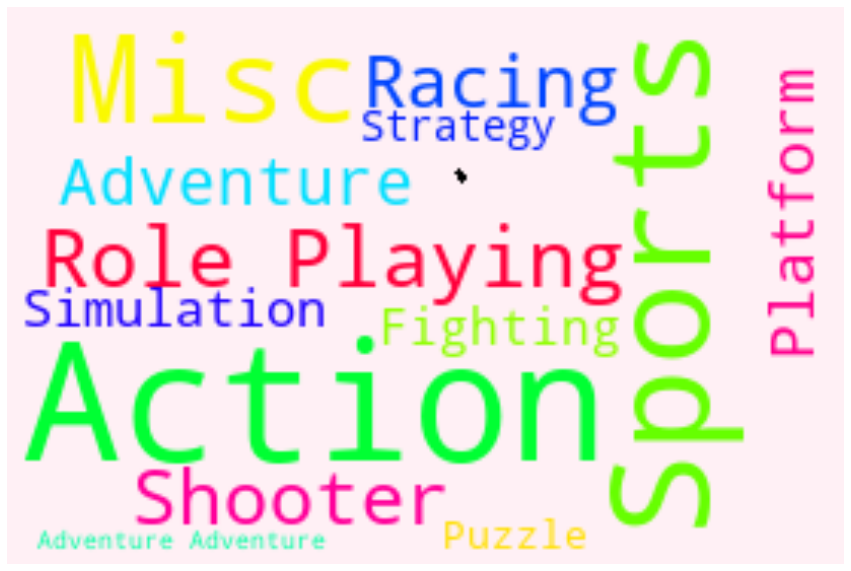

In [201]:
#Analyse des jeux vidéos par Genre

#Création d'un nuage de mots sur la variable Genre :

#installation de wordcloud
!pip install wordcloud

#importation des libraries wordcloud et stopword
from wordcloud import WordCloud, STOPWORDS 

#importation du masque
wave_mask= np.array(Image.open("images.jpeg"))
stopwords = set(STOPWORDS) #suppression des mots inutile
stopwords.update(["II", "III"]) #ajout dans la liste stopwords de II & III 

plt.subplots(figsize=(15,15))
wordcloud = WordCloud(mask=wave_mask,background_color="lavenderblush",colormap="hsv" ,contour_width=2, contour_color="black",
                      width=950,stopwords=stopwords,
                          height=950
                         ).generate(" ".join(df.Genre))

plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')
plt.savefig('graph.png')

plt.show()

In [226]:
#Analyse corrélation entre variables 

#création du tableau de corrélation 
corr = df.corr()

#Affichage de la matrice pour toutes les variables du df 
trace = go.Heatmap(z =  corr.values,
                   x =  corr.index.values,
                   y=  corr.columns.values,
                   colorscale = 'Viridis',
               )

layout = go.Layout( title = " Matrice de corrélation")

fig = go.Figure(data=[trace], layout = layout)

iplot(fig)



,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.400328,-0.379024,-0.269138,-0.332521,-0.426880
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.400328,-0.091402,1.000000,0.768936,0.451285,0.634508,0.941268
EU_Sales,-0.379024,0.006014,0.768936,1.000000,0.436414,0.726266,0.903271
JP_Sales,-0.269138,-0.169316,0.451285,0.436414,1.000000,0.290653,0.612794
Other_Sales,-0.332521,0.041058,0.634508,0.726266,0.290653,1.000000,0.747974
Global_Sales,-0.426880,-0.074735,0.941268,0.903271,0.612794,0.747974,1.000000
